In [2]:
from io import StringIO
import numpy as np
import numpy.matlib as npm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
from sklearn.decomposition import PCA

In [13]:
def testPCAFit(matrix,n,three_D=False,scatter=False):
    samples = 20
    pca = PCA(n_components=n)
    pca.fit(matrix)

    reducedMatrixPCA = pca.transform(matrix)
    reconMatrixPCA = pca.inverse_transform(reducedMatrixPCA)

    reconCostPCA = np.mean(np.power(reconMatrixPCA - matrix,2),axis = 1)
    reconCostPCA = reconCostPCA.reshape(-1, 1)
    print('Reconstruction MSE : ',np.mean(reconCostPCA))
    
    if three_D:
        if scatter:
            fig = plt.figure(figsize=(10,6))
            ax = plt.axes(projection='3d')
            #ax.plot_wireframe(matrix[:,0],matrix[:,1],matrix[:,2])
            ax.scatter3D(reconMatrixPCA[:500,1],reconMatrixPCA[:500,123],reconMatrixPCA[:500,575])
            #plt.savefig('C:\Projekte\\dev\\git\\Masterarbeit\\PAC_Tests\\Nicht_LinearerFall\\3D_Scatter_mitPCA.png')

        else:
            X = reconMatrixPCA[:,0].reshape(samples,samples)
            Y = reconMatrixPCA[:,1].reshape(samples,samples)
            Z = reconMatrixPCA[:,2].reshape(samples,samples)

            fig = plt.figure(figsize=(10,6))
            ax = plt.axes(projection='3d')
            ax.plot_wireframe(X,Y,Z)
            #plt.savefig('C:\Projekte\\dev\\git\\Masterarbeit\\PAC_Tests\\Nicht_LinearerFall\\3D_mitPCA.png')
            #ax.view_init(0,60)
    else:
        #print(reconMatrixPCA[:,1])
        fig = plt.figure(figsize=(10,6))
        plt.plot(reconMatrixPCA[:,0],reconMatrixPCA[:,1])
        #plt.savefig('C:\\Projekte\\dev\\git\\Masterarbeit\\PAC_Tests\\Nicht_LinearerFall\\2D_mitPCA.png')

        
    return np.mean(reconCostPCA)

## ----------------------------------------------------------------------------------------------------------------------------------
# Test in 2D

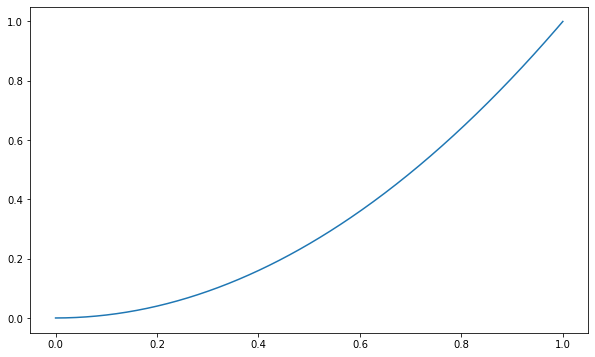

In [77]:
samples = 400
matrix = np.empty((samples,2))
matrix[:,0] = np.linspace(0,1000,samples)
matrix[:,1] = matrix[:,0]**2 + 20
#matrix = matrix + 10 * np.random.normal(size=matrix.shape)
matrix.shape

for i in range(matrix.shape[1]):
    matrix[:, i] = (matrix[:, i] - matrix[:, i].min()) / (matrix[:, i].max() - matrix[:, i].min())

fig = plt.figure(figsize=(10,6))
plt.plot(matrix[:,0],matrix[:,1])
#plt.savefig('C:\Projekte\\dev\\git\\Masterarbeit\\PAC_Tests\\Nicht_LinearerFall\\2D_ohnePCA.png')

Reconstruction MSE :  0.0013793306614134338


0.0013793306614134338

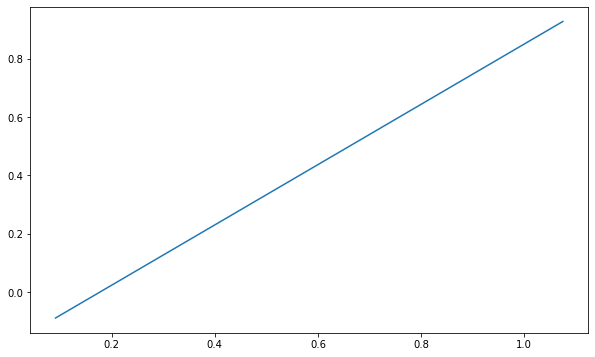

In [76]:
testPCAFit(matrix,1)

## ----------------------------------------------------------------------------------------------------------------------------------
# Test in 3D

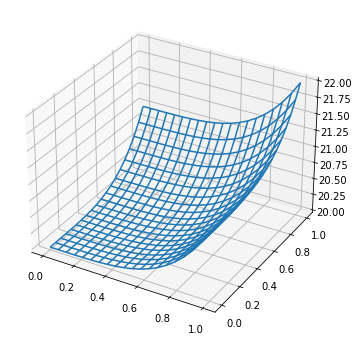

In [78]:
samples = 20
x = np.linspace(0,1,samples)
y = x
X,Y = np.meshgrid(x,y)
Z = Y**4 + X**4+ 20

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z)
#ax.scatter3D(X, Y, Z)
#plt.savefig('C:\Projekte\\dev\\git\\Masterarbeit\\PAC_Tests\\Nicht_LinearerFall\\3D_ohnePCA.png')

Reconstruction MSE :  0.0026829443116039766


0.0026829443116039766

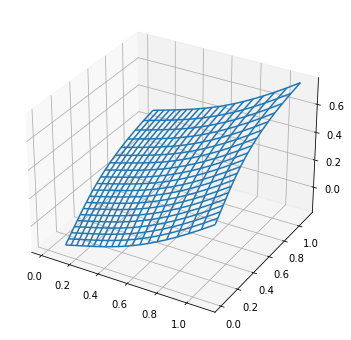

In [63]:
matrix = np.empty((samples*samples,3))
matrix[:,0] = X.reshape(samples*samples)
matrix[:,1] = Y.reshape(samples*samples)
matrix[:,2] = Z.reshape(samples*samples)
for i in range(matrix.shape[1]):
    matrix[:, i] = (matrix[:, i] - matrix[:, i].min()) / (matrix[:, i].max() - matrix[:, i].min())

testPCAFit(matrix,2,True)

## ----------------------------------------------------------------------------------------------------------------------------------
# Test in 3D mit Scatter

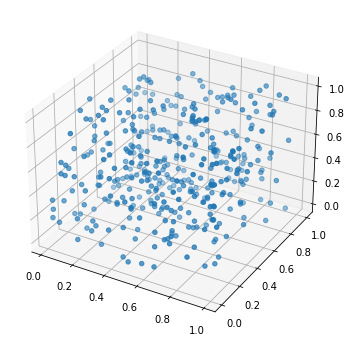

In [79]:
samples = 400
matrix = np.random.uniform(low=0,high=1,size=(samples,3))

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2])
#plt.savefig('C:\Projekte\\dev\\git\\Masterarbeit\\PAC_Tests\\Nicht_LinearerFall\\3D_Scatter_ohnePCA.png')

Reconstruction MSE :  0.024583432788813187


0.024583432788813187

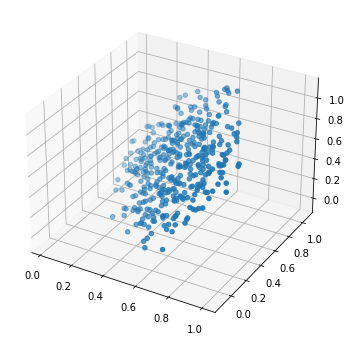

In [65]:
testPCAFit(matrix,2,True,scatter=True)